## 데이터 로드 및 전처리

In [1]:
from tensorflow.keras import models, layers, optimizers, regularizers, callbacks
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

# 데이터 표준화
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data -= mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data /= std
# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data -= mean
test_data /= std

57026/57026 [==============================] - 0s 0us/step
404
102


## 모델 정의

In [2]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(), input_shape=(train_data.shape[1],)))
model.add(Dropout(0.2))
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2()))
model.add(layers.Dense(1))

# 모델 컴파일
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mse', metrics=['mae'])

# 조기 종료 콜백 정의
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

## 학습

In [3]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
# (train_data, train_labels), (test_data, test_labels)
from tensorflow.keras import callbacks
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(train_data, train_labels,
                    epochs=100,
                    batch_size=1,
                    validation_data=(test_data, test_labels),
                    callbacks=[early_stopping])

Epoch 1/100
404/404 [==============================] - 4s 8ms/step - loss: 263.6026 - mae: 13.4092 - val_loss: 63.3401 - val_mae: 6.0634
Epoch 2/100
404/404 [==============================] - 3s 8ms/step - loss: 53.0831 - mae: 5.1098 - val_loss: 35.1608 - val_mae: 4.4936
Epoch 3/100
404/404 [==============================] - 2s 4ms/step - loss: 39.3651 - mae: 4.3759 - val_loss: 30.0181 - val_mae: 4.1640
Epoch 4/100
404/404 [==============================] - 2s 5ms/step - loss: 31.4378 - mae: 3.9223 - val_loss: 23.2249 - val_mae: 3.6161
Epoch 5/100
404/404 [==============================] - 1s 2ms/step - loss: 27.1585 - mae: 3.7221 - val_loss: 22.3286 - val_mae: 3.4301
Epoch 6/100
404/404 [==============================] - 1s 2ms/step - loss: 25.8803 - mae: 3.4469 - val_loss: 24.4324 - val_mae: 3.5743
Epoch 7/100
404/404 [==============================] - 1s 2ms/step - loss: 22.0798 - mae: 3.3473 - val_loss: 21.1461 - val_mae: 3.1643
Epoch 8/100
404/404 [==============================] 

## 결과 및 평가

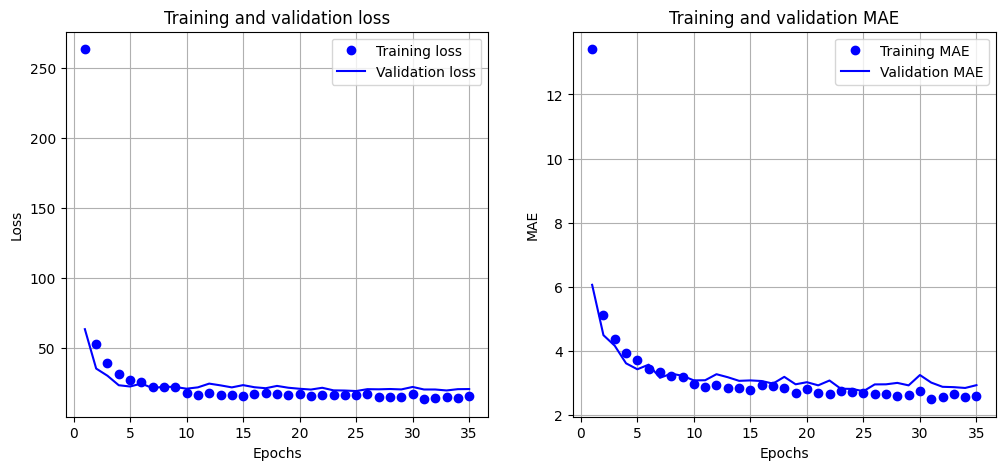

4/4 [==============================] - 0s 4ms/step - loss: 19.0759 - mae: 2.7459
Mean Squared Error: 19.075851440429688
Mean Absolute Error: 2.7458555698394775


In [4]:
# 학습 결과 그래프
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

plt.subplot(1, 2, 2)
plt.plot(epochs, mae, 'bo', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.grid()
plt.legend()

plt.show()

# 테스트 데이터로 모델 평가
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print("Mean Squared Error:", test_mse_score)
print("Mean Absolute Error:", test_mae_score)